# FBProphet - NO2

## Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/data_imputed.csv')
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [3]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

In [4]:
data = df[['timestamp_local','no2']]

In [5]:
data = data.rename(columns={'timestamp_local': 'ds', 'no2': 'y'})

In [6]:
X = data[:-168]

In [7]:
y = data[-168:]

## Model Fitting

In [8]:
from prophet import Prophet

In [9]:
m = Prophet()
m.fit(X)

22:56:03 - cmdstanpy - INFO - Chain [1] start processing
22:56:09 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,27.697884,9.264010,46.323049
18212,2024-02-29 20:00:00,35.489385,16.543058,53.691280
18213,2024-02-29 21:00:00,39.303755,21.008936,58.592537
18214,2024-02-29 22:00:00,39.411759,22.465541,58.703280
18215,2024-02-29 23:00:00,37.542391,19.154781,55.755560


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


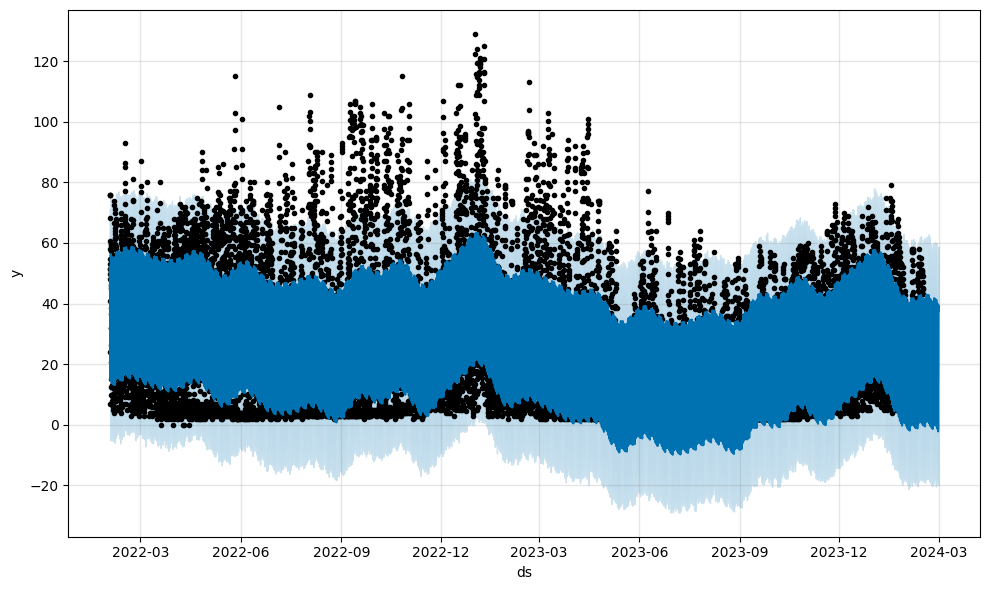

In [12]:
fig1 = m.plot(forecast)

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

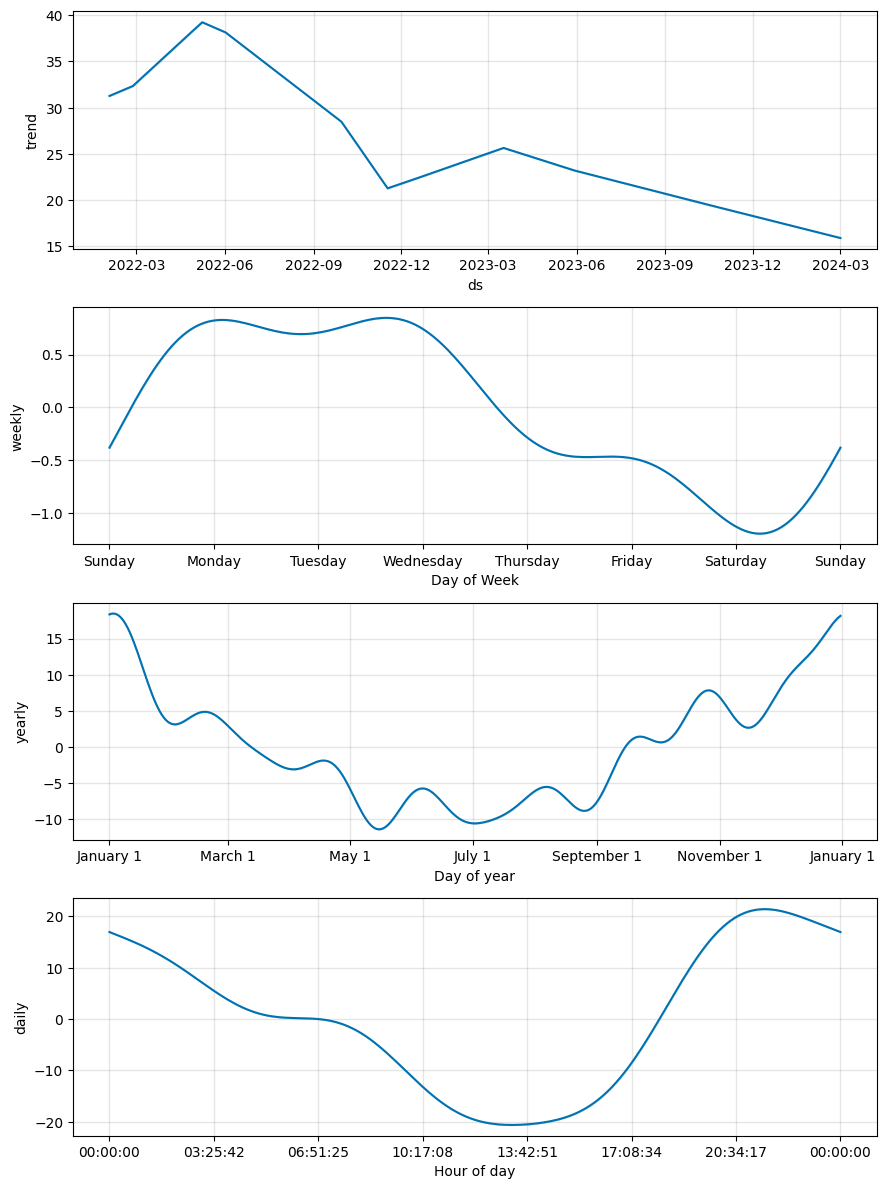

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
predicted = forecast[-168:]

In [15]:
((y['y']-predicted['yhat'])**2).mean()**0.5

12.637083069253437

## Non Stationary

In [16]:
m = Prophet(interval_width=0.95)
m.fit(X)

22:56:31 - cmdstanpy - INFO - Chain [1] start processing
22:56:36 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,27.697884,-1.040988,55.670384
18212,2024-02-29 20:00:00,35.489385,5.862572,62.078027
18213,2024-02-29 21:00:00,39.303755,12.146788,67.691308
18214,2024-02-29 22:00:00,39.411759,10.223379,66.290247
18215,2024-02-29 23:00:00,37.542391,9.861038,67.068298


<Axes: xlabel='ds'>

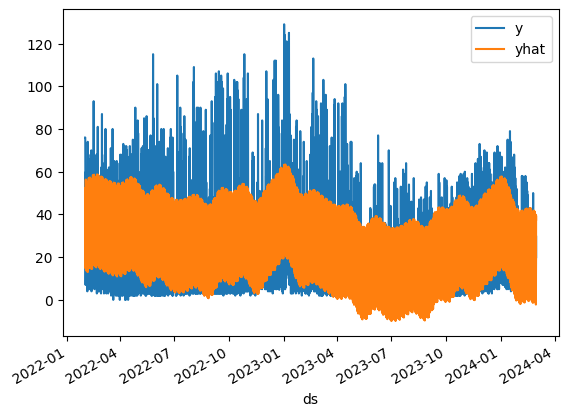

In [19]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [20]:
((y['y']-predicted['yhat'])**2).mean()**0.5

12.637083069253437

## Multiplicative

In [21]:
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.fit(X)

22:57:05 - cmdstanpy - INFO - Chain [1] start processing
22:57:12 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,28.430693,0.928816,58.788962
18212,2024-02-29 20:00:00,34.604855,8.308300,62.668678
18213,2024-02-29 21:00:00,37.625013,10.697008,64.885729
18214,2024-02-29 22:00:00,37.740726,11.268436,63.823812
18215,2024-02-29 23:00:00,36.375076,8.254588,64.071370


<Axes: xlabel='ds'>

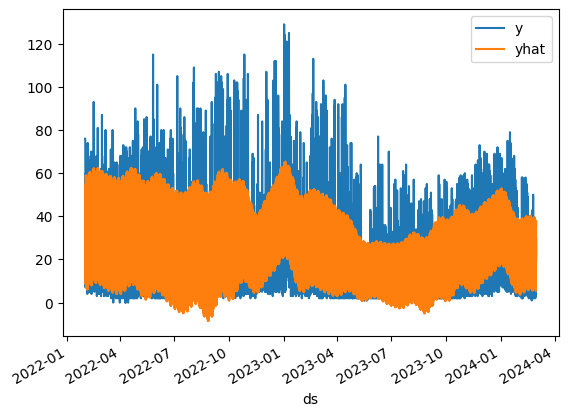

In [24]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [25]:
((data['y']-forecast['yhat'])**2).mean()**0.5

14.754379396653704

In [26]:
from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '600 days', horizon = '30 days')
df_p = performance_metrics(cv_results)
df_p

  0%|          | 0/9 [00:00<?, ?it/s]

22:57:27 - cmdstanpy - INFO - Chain [1] start processing
22:57:31 - cmdstanpy - INFO - Chain [1] done processing
22:57:34 - cmdstanpy - INFO - Chain [1] start processing
22:57:38 - cmdstanpy - INFO - Chain [1] done processing
22:57:41 - cmdstanpy - INFO - Chain [1] start processing
22:57:45 - cmdstanpy - INFO - Chain [1] done processing
22:57:48 - cmdstanpy - INFO - Chain [1] start processing
22:57:51 - cmdstanpy - INFO - Chain [1] done processing
22:57:54 - cmdstanpy - INFO - Chain [1] start processing
22:57:59 - cmdstanpy - INFO - Chain [1] done processing
22:58:02 - cmdstanpy - INFO - Chain [1] start processing
22:58:06 - cmdstanpy - INFO - Chain [1] done processing
22:58:09 - cmdstanpy - INFO - Chain [1] start processing
22:58:14 - cmdstanpy - INFO - Chain [1] done processing
22:58:17 - cmdstanpy - INFO - Chain [1] start processing
22:58:22 - cmdstanpy - INFO - Chain [1] done processing
22:58:25 - cmdstanpy - INFO - Chain [1] start processing
22:58:36 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,99.024790,9.951120,7.724258,0.429655,0.257843,0.339969,0.996914
1,3 days 01:00:00,97.751517,9.886937,7.673711,0.425109,0.254647,0.338122,0.996914
2,3 days 02:00:00,96.447363,9.820762,7.638992,0.421356,0.254647,0.336744,0.996914
3,3 days 03:00:00,94.989455,9.746253,7.601304,0.417592,0.252985,0.335214,0.996914
4,3 days 04:00:00,94.595292,9.726011,7.594451,0.415384,0.251177,0.334726,0.996914
...,...,...,...,...,...,...,...,...
644,29 days 20:00:00,213.670916,14.617487,10.984129,0.827114,0.349884,0.459783,0.929012
645,29 days 21:00:00,212.904573,14.591250,11.016015,0.825721,0.354554,0.460839,0.930556
646,29 days 22:00:00,212.727925,14.585195,11.079645,0.823816,0.360759,0.462464,0.933642
647,29 days 23:00:00,213.589569,14.614704,11.175740,0.821081,0.364769,0.464649,0.935185
